In [17]:
import numpy as np
#numpy function:
#1.where ------find the position of true
x= np.arange(0,10,0.5)
mask = (x>5)* (x<9.5)
index = np.where(mask)
print("where:", index, x[index])
#2.take---------get some parts from the original one
print("take:", np.take([-2,-3,1,5,2,7,5], [2,3]))
#3.choose-----------construct an array by picking elements from several arrays
get = [1,0,1,1]
choices = [[-2,-3,1,5], [1,5,2,7]]
print("choose:", np.choose(get, choices))
#matrix algibra
#+-*, * is element wise, like np.dot
A = np.array([[1,2,3,4], [2,3,4,5], [3,4,5,6]])
print("operation:", "A",A, "A.shape", A.shape, "A*A", A*A, "np.dot", np.dot(A,get),"A*get", A*get)

where: (array([11, 12, 13, 14, 15, 16, 17, 18], dtype=int64),) [ 5.5  6.   6.5  7.   7.5  8.   8.5  9. ]
take: [1 5]
choose: [ 1 -3  2  7]
operation: A [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]] A.shape (3, 4) A*A [[ 1  4  9 16]
 [ 4  9 16 25]
 [ 9 16 25 36]] np.dot [ 8 11 14] A*get [[1 0 3 4]
 [2 0 4 5]
 [3 0 5 6]]


In [50]:
#pandas
import pandas as pd
#create a df with pandas
a = [1,2,3,4]
b = ['apple', 'banana', 'pear', 'lemon']
my = {'price':a, "item":b}#python list
df = pd.DataFrame(my)
print(my, df)
#add/append new col to df
df['quantity'] = [10,20,30,40]
print(df)
#operations
df['totalprice'] = df['price']*df['quantity']
print(df)
#apply a function
df['tax'] = df['price'].apply(lambda x: x*0.07)
df['tax'].astype(int)
print(df)
#delete/drop row/col
df1 = df.drop(3, axis = 0)
df2 = df.drop('tax', axis = 1, inplace = False)
print("drop by row")
print(df1)
print(" ")
print("drop by col")
print(df2)


{'price': [1, 2, 3, 4], 'item': ['apple', 'banana', 'pear', 'lemon']}      item  price
0   apple      1
1  banana      2
2    pear      3
3   lemon      4
     item  price  quantity
0   apple      1        10
1  banana      2        20
2    pear      3        30
3   lemon      4        40
     item  price  quantity  totalprice
0   apple      1        10          10
1  banana      2        20          40
2    pear      3        30          90
3   lemon      4        40         160
     item  price  quantity  totalprice   tax
0   apple      1        10          10  0.07
1  banana      2        20          40  0.14
2    pear      3        30          90  0.21
3   lemon      4        40         160  0.28
drop by row
     item  price  quantity  totalprice   tax
0   apple      1        10          10  0.07
1  banana      2        20          40  0.14
2    pear      3        30          90  0.21
 
drop by col
     item  price  quantity  totalprice
0   apple      1        10          10
1  ban

D:\Anaconda\New folder\envs\py3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda\New folder\envs\py3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [49]:
#drop na
df['price'][0] = np.nan
print("NaN df")
print(df)
df3 = df.dropna(axis = 0)
df4 = df.dropna(axis = 1)
print("drop na by row")
print(df3)
print(" ")
print("drop na by col")
print(df4)

1

In [52]:
#filling a missing data
df['item'][2] = np.nan
#filling with number
df['price'].fillna(0)
#filling specific values
df['item'].fillna('pear')

D:\Anaconda\New folder\envs\py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0     apple
1    banana
2      pear
3     lemon
Name: item, dtype: object

In [55]:
#unique values, value_counts, conditional selecting
un = pd.Series(['c','e','f','g','g','q','e', 'c','c'])
print(un.unique(), un.value_counts())
un.isin(['b','c'])


['c' 'e' 'f' 'g' 'q'] c    3
g    2
e    2
f    1
q    1
dtype: int64


0     True
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8     True
dtype: bool

In [59]:
#split combine
nf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
nf['A'].unique()
nf.groupby('A').sum()
nf.groupby(['A','B']).mean()

C         D
A   B                        
bar one   -0.137281 -1.311499
    three  0.812755  0.457029
    two    0.595337 -0.953073
foo one   -0.824038  0.720657
    three  1.048283  1.497528
    two   -0.244616  0.524298

In [65]:
#import Batting data
batting = pd.read_csv("Batting.csv")
#take a look
batting.describe()
batting.info()
batting.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97889 entries, 0 to 97888
Data columns (total 24 columns):
playerID     97889 non-null object
yearID       97889 non-null int64
stint        97889 non-null int64
teamID       97889 non-null object
lgID         97152 non-null object
G            97889 non-null int64
G_batting    96483 non-null float64
AB           91476 non-null float64
R            91476 non-null float64
H            91476 non-null float64
2B           91476 non-null float64
3B           91476 non-null float64
HR           91476 non-null float64
RBI          91052 non-null float64
SB           90176 non-null float64
CS           68022 non-null float64
BB           91476 non-null float64
SO           83638 non-null float64
IBB          54912 non-null float64
HBP          88656 non-null float64
SH           85138 non-null float64
SF           55443 non-null float64
GIDP         65368 non-null float64
G_old        92700 non-null float64
dtypes: float64(18), int64(3), objec

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1,aardsda01,2006,1,CHN,NL,45,43.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
2,aardsda01,2007,1,CHA,AL,25,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,aardsda01,2008,1,BOS,AL,47,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
4,aardsda01,2009,1,SEA,AL,73,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [75]:
len(batting['teamID'].unique())
#set index 
batting = batting.set_index('teamID')

KeyError: 'teamID'

In [78]:
batting.head()

,playerID,yearID,stint,lgID,G,G_batting,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
teamID,,,,,,,,,,,,,,,,,,,,,
SFN,aardsda01,2004,1,NL,11,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
CHN,aardsda01,2006,1,NL,45,43.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
CHA,aardsda01,2007,1,AL,25,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
BOS,aardsda01,2008,1,AL,47,5.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
SEA,aardsda01,2009,1,AL,73,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [83]:
#how to use this index
batting.ix['CHN'].head()
batting.loc['CHN'].head()#return the rows of this index, the same as ix
print(len(batting.ix['CHN']), len(batting.loc['CHN']))
batting.iloc[3]#the 3rd row

4720 4720


playerID     aardsda01
yearID            2008
stint                1
lgID                AL
G                   47
G_batting            5
AB                   1
R                    0
H                    0
2B                   0
3B                   0
HR                   0
RBI                  0
SB                   0
CS                   0
BB                   0
SO                   1
IBB                  0
HBP                  0
SH                   0
SF                   0
GIDP                 0
G_old                5
Name: BOS, dtype: object

In [90]:
#reset the index
batting = batting.reset_index()

In [91]:
#filter
##want to know all the people that had...
#1.More than 100 at bats
condition1 = batting['AB']>100


#2.more than 50 home runs
condition2 = batting['HR'] >50


#3. in the years between 1980 to 2000
condition3 = (batting['yearID'] <2000)&(batting['yearID']>1980)

#filter
filtered_batting = batting[condition1&condition2&condition3]
filtered_batting

,teamID,playerID,yearID,stint,lgID,G,G_batting,AB,R,H,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,year
26613,DET,fieldce01,1990,1,AL,159,159.0,573.0,104.0,159.0,...,1.0,90.0,182.0,11.0,5.0,0.0,5.0,15.0,159.0,1990-01-01
33249,SEA,griffke02,1997,1,AL,157,157.0,608.0,125.0,185.0,...,4.0,76.0,121.0,23.0,8.0,0.0,12.0,12.0,157.0,1997-01-01
33250,SEA,griffke02,1998,1,AL,161,161.0,633.0,120.0,180.0,...,5.0,76.0,121.0,11.0,7.0,0.0,4.0,14.0,161.0,1998-01-01
56911,OAK,mcgwima01,1996,1,AL,130,130.0,423.0,104.0,132.0,...,0.0,116.0,112.0,16.0,8.0,0.0,1.0,14.0,130.0,1996-01-01
56914,SLN,mcgwima01,1998,1,NL,155,155.0,509.0,130.0,152.0,...,0.0,162.0,155.0,28.0,6.0,0.0,4.0,8.0,155.0,1998-01-01
56915,SLN,mcgwima01,1999,1,NL,153,153.0,521.0,118.0,145.0,...,0.0,133.0,141.0,21.0,2.0,0.0,5.0,12.0,153.0,1999-01-01
81928,CHN,sosasa01,1998,1,NL,159,159.0,643.0,134.0,198.0,...,9.0,73.0,171.0,14.0,1.0,0.0,5.0,20.0,159.0,1998-01-01
81929,CHN,sosasa01,1999,1,NL,162,162.0,625.0,114.0,180.0,...,8.0,78.0,171.0,8.0,3.0,0.0,6.0,17.0,162.0,1999-01-01


In [99]:
#change date_variable into a better form
batting['year'] = pd.to_datetime(batting['yearID'], format = '%Y')
batting['year'].head()

#set time as index
batting_year_index = batting.set_index('year')


In [98]:
batting_year_index.head()
batting_year_index.loc['2005-01-01':'2007-01-01']

,teamID,playerID,yearID,stint,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
year,,,,,,,,,,,,,,,,,,,,,
2006-01-01,CHN,aardsda01,2006,1,NL,45,43.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
2007-01-01,CHA,aardsda01,2007,1,AL,25,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2006-01-01,CIN,abadan01,2006,1,NL,5,5.0,3.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2006-01-01,FLO,abercre01,2006,1,NL,111,111.0,255.0,39.0,54.0,...,6.0,5.0,18.0,78.0,2.0,3.0,4.0,1.0,2.0,111.0
2007-01-01,FLO,abercre01,2007,1,NL,35,35.0,76.0,16.0,15.0,...,7.0,1.0,2.0,22.0,0.0,2.0,0.0,0.0,1.0,35.0
2005-01-01,MIN,abernbr01,2005,1,AL,24,24.0,67.0,5.0,16.0,...,2.0,0.0,7.0,9.0,0.0,1.0,3.0,1.0,2.0,24.0
2005-01-01,PHI,abreubo01,2005,1,NL,162,162.0,588.0,104.0,168.0,...,31.0,9.0,117.0,134.0,15.0,6.0,0.0,8.0,7.0,162.0
2006-01-01,PHI,abreubo01,2006,1,NL,98,98.0,339.0,61.0,94.0,...,20.0,4.0,91.0,86.0,5.0,2.0,0.0,6.0,8.0,98.0
2006-01-01,NYA,abreubo01,2006,2,AL,58,58.0,209.0,37.0,69.0,...,10.0,2.0,33.0,52.0,1.0,1.0,2.0,3.0,5.0,58.0


In [117]:
filtered_batting

,teamID,playerID,yearID,stint,lgID,G,G_batting,AB,R,H,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,year
26613,DET,fieldce01,1990,1,AL,159,159.0,573.0,104.0,159.0,...,1.0,90.0,182.0,11.0,5.0,0.0,5.0,15.0,159.0,1990-01-01
33249,SEA,griffke02,1997,1,AL,157,157.0,608.0,125.0,185.0,...,4.0,76.0,121.0,23.0,8.0,0.0,12.0,12.0,157.0,1997-01-01
33250,SEA,griffke02,1998,1,AL,161,161.0,633.0,120.0,180.0,...,5.0,76.0,121.0,11.0,7.0,0.0,4.0,14.0,161.0,1998-01-01
56911,OAK,mcgwima01,1996,1,AL,130,130.0,423.0,104.0,132.0,...,0.0,116.0,112.0,16.0,8.0,0.0,1.0,14.0,130.0,1996-01-01
56914,SLN,mcgwima01,1998,1,NL,155,155.0,509.0,130.0,152.0,...,0.0,162.0,155.0,28.0,6.0,0.0,4.0,8.0,155.0,1998-01-01
56915,SLN,mcgwima01,1999,1,NL,153,153.0,521.0,118.0,145.0,...,0.0,133.0,141.0,21.0,2.0,0.0,5.0,12.0,153.0,1999-01-01
81928,CHN,sosasa01,1998,1,NL,159,159.0,643.0,134.0,198.0,...,9.0,73.0,171.0,14.0,1.0,0.0,5.0,20.0,159.0,1998-01-01
81929,CHN,sosasa01,1999,1,NL,162,162.0,625.0,114.0,180.0,...,8.0,78.0,171.0,8.0,3.0,0.0,6.0,17.0,162.0,1999-01-01


In [120]:
#some useful functions of pandas
print("return row names")
print(filtered_batting.index) 
print("return col names:")
print(filtered_batting.columns)
print("set index")
print(filtered_batting.set_index("lgID"))

#rename of col
#1.
#filtered_batting.columns = ['new_name1', "new_name2",...]
#2.filtered_batting = filtered_batting.renames(columns = {'old name1";"new_name1",..})

#get the variables(cols) you want
filtered_batting[["teamID", 'yearID']

return row names
Int64Index([26613, 33249, 33250, 56911, 56914, 56915, 81928, 81929], dtype='int64')
return col names:
Index(['teamID', 'playerID', 'yearID', 'stint', 'lgID', 'G', 'G_batting', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP',
       'SH', 'SF', 'GIDP', 'G_old', 'year'],
      dtype='object')
set index
     teamID   playerID  yearID  stint    G  G_batting     AB      R      H  \
lgID                                                                         
AL      DET  fieldce01    1990      1  159      159.0  573.0  104.0  159.0   
AL      SEA  griffke02    1997      1  157      157.0  608.0  125.0  185.0   
AL      SEA  griffke02    1998      1  161      161.0  633.0  120.0  180.0   
AL      OAK  mcgwima01    1996      1  130      130.0  423.0  104.0  132.0   
NL      SLN  mcgwima01    1998      1  155      155.0  509.0  130.0  152.0   
NL      SLN  mcgwima01    1999      1  153      153.0  521.0  118.0  145.0   
NL      CHN   sosasa

D:\Anaconda\New folder\envs\py3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


,teamID,playerID,yearID,stint,lgID,G,G_batting,AB,R,H,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,year


In [125]:
#get rows (.loc, or .iloc)
#.iloc for position indexing
filtered_batting.iloc[0:5]
#.loc for label based indexing
filtered_batting.loc[[56911, 33249]]

,teamID,playerID,yearID,stint,lgID,G,G_batting,AB,R,H,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,year
56911,OAK,mcgwima01,1996,1,AL,130,130.0,423.0,104.0,132.0,...,0.0,116.0,112.0,16.0,8.0,0.0,1.0,14.0,130.0,1996-01-01
33249,SEA,griffke02,1997,1,AL,157,157.0,608.0,125.0,185.0,...,4.0,76.0,121.0,23.0,8.0,0.0,12.0,12.0,157.0,1997-01-01


In [126]:
#get values
filtered_batting['yearID'].values

array([1990, 1997, 1998, 1996, 1998, 1999, 1998, 1999], dtype=int64)

In [130]:
#sorting
filtered_batting.sort_values(by=['yearID', 'AB'])


,teamID,playerID,yearID,stint,lgID,G,G_batting,AB,R,H,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,year
26613,DET,fieldce01,1990,1,AL,159,159.0,573.0,104.0,159.0,...,1.0,90.0,182.0,11.0,5.0,0.0,5.0,15.0,159.0,1990-01-01
56911,OAK,mcgwima01,1996,1,AL,130,130.0,423.0,104.0,132.0,...,0.0,116.0,112.0,16.0,8.0,0.0,1.0,14.0,130.0,1996-01-01
33249,SEA,griffke02,1997,1,AL,157,157.0,608.0,125.0,185.0,...,4.0,76.0,121.0,23.0,8.0,0.0,12.0,12.0,157.0,1997-01-01
56914,SLN,mcgwima01,1998,1,NL,155,155.0,509.0,130.0,152.0,...,0.0,162.0,155.0,28.0,6.0,0.0,4.0,8.0,155.0,1998-01-01
33250,SEA,griffke02,1998,1,AL,161,161.0,633.0,120.0,180.0,...,5.0,76.0,121.0,11.0,7.0,0.0,4.0,14.0,161.0,1998-01-01
81928,CHN,sosasa01,1998,1,NL,159,159.0,643.0,134.0,198.0,...,9.0,73.0,171.0,14.0,1.0,0.0,5.0,20.0,159.0,1998-01-01
56915,SLN,mcgwima01,1999,1,NL,153,153.0,521.0,118.0,145.0,...,0.0,133.0,141.0,21.0,2.0,0.0,5.0,12.0,153.0,1999-01-01
81929,CHN,sosasa01,1999,1,NL,162,162.0,625.0,114.0,180.0,...,8.0,78.0,171.0,8.0,3.0,0.0,6.0,17.0,162.0,1999-01-01


In [134]:
#ranking
filtered_batting.rank()#give the rank index of each value within their own col

,teamID,playerID,yearID,stint,lgID,G,G_batting,AB,R,H,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,year
26613,3.0,1.0,1.0,4.5,2.5,5.5,5.5,4.0,1.5,4.0,...,4.0,5.0,8.0,2.5,4.0,4.5,5.0,6.0,5.5,1.0
33249,5.5,2.5,3.0,4.5,2.5,4.0,4.0,5.0,6.0,7.0,...,5.0,2.5,2.5,7.0,7.5,4.5,8.0,2.5,4.0,3.0
33250,5.5,2.5,5.0,4.5,2.5,7.0,7.0,7.0,5.0,5.5,...,6.0,2.5,2.5,2.5,6.0,4.5,2.5,4.5,7.0,5.0
56911,4.0,5.0,2.0,4.5,2.5,1.0,1.0,1.0,1.5,1.0,...,2.0,6.0,1.0,5.0,7.5,4.5,1.0,4.5,1.0,2.0
56914,7.5,5.0,5.0,4.5,6.5,3.0,3.0,2.0,7.0,3.0,...,2.0,8.0,5.0,8.0,5.0,4.5,2.5,1.0,3.0,5.0
56915,7.5,5.0,7.5,4.5,6.5,2.0,2.0,3.0,4.0,2.0,...,2.0,7.0,4.0,6.0,2.0,4.5,5.0,2.5,2.0,7.5
81928,1.5,7.5,5.0,4.5,6.5,5.5,5.5,8.0,8.0,8.0,...,8.0,1.0,6.5,4.0,1.0,4.5,5.0,8.0,5.5,5.0
81929,1.5,7.5,7.5,4.5,6.5,8.0,8.0,6.0,3.0,5.5,...,7.0,4.0,6.5,1.0,3.0,4.5,7.0,7.0,8.0,7.5


In [135]:
filtered_batting.dtypes
#df['float_col'].astype(int)

teamID               object
playerID             object
yearID                int64
stint                 int64
lgID                 object
G                     int64
G_batting           float64
AB                  float64
R                   float64
H                   float64
2B                  float64
3B                  float64
HR                  float64
RBI                 float64
SB                  float64
CS                  float64
BB                  float64
SO                  float64
IBB                 float64
HBP                 float64
SH                  float64
SF                  float64
GIDP                float64
G_old               float64
year         datetime64[ns]
dtype: object

In [ ]:
#join/merge 2 dfs()
joined = df1.join(df2)
merged = pd.merge(df1, df2, on ='key_col')
#append rows
pd.concat([df1, df2, series3])

In [131]:
#groupby
filtered_batting.groupby('year').sum()

,yearID,stint,G,G_batting,AB,R,H,2B,3B,HR,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
year,,,,,,,,,,,,,,,,,,,,,
1990-01-01,1990,1,159,159.0,573.0,104.0,159.0,25.0,1.0,51.0,...,0.0,1.0,90.0,182.0,11.0,5.0,0.0,5.0,15.0,159.0
1996-01-01,1996,1,130,130.0,423.0,104.0,132.0,21.0,0.0,52.0,...,0.0,0.0,116.0,112.0,16.0,8.0,0.0,1.0,14.0,130.0
1997-01-01,1997,1,157,157.0,608.0,125.0,185.0,34.0,3.0,56.0,...,15.0,4.0,76.0,121.0,23.0,8.0,0.0,12.0,12.0,157.0
1998-01-01,5994,3,475,475.0,1785.0,384.0,530.0,74.0,3.0,192.0,...,39.0,14.0,311.0,447.0,53.0,14.0,0.0,13.0,42.0,475.0
1999-01-01,3998,2,315,315.0,1146.0,232.0,325.0,45.0,3.0,128.0,...,7.0,8.0,211.0,312.0,29.0,5.0,0.0,11.0,29.0,315.0


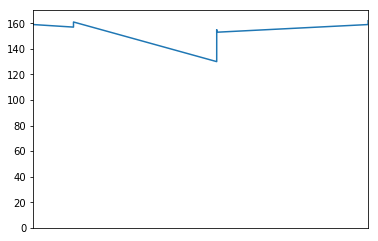

In [133]:
#plot
filtered_batting["G"].plot(kind = "bar")
filtered_batting["G"].plot(kind = "line")#bar, scatter, line, kde, pie, area

In [140]:
#matplot
import matplotlib as plt
% matplotlib inline


In [146]:
#some settings
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) #left bottom, width, height([0,1])
#axes.plot(filtered_batting['yearID'], filtered_batting['G'])


TypeError: 'module' object is not callable